1. Import Required Libraries
2. Load the Dataset
3. Initial Data Inspection
4. Check for Missing Values
5. remove unnecessary columns
6. Check for Outliers
7. Check Feature Correlation
8. Select Features and Target
9. Feature Scaling
10. Split the Dataset
11. Train the Model
12. Predict on Test Data
13. Evaluate the Model
14. Visualize Predictions[link text](https://)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


1. Import Required Libraries


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,SGDRegressor
from sklearn.preprocessing import PolynomialFeatures,StandardScaler
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline

X = 6 * np.random.rand(200, 1) - 3

np.random.rand(200, 1) generates 200 random numbers between 0 and 1 (in a column format).

Multiplying by 6 gives random numbers between 0 and 6.

Subtracting 3 shifts that range to between -3 and +3.

y = 0.8 * X**2 + 0.9 * X + 2 + np.random.randn(200, 1)
0.8 * X**2: a quadratic term (curved relationship)

+ 0.9 * X: a linear term

+ 2: a constant offset (intercept)

+ np.random.randn(200, 1): adds random noise (from standard normal distribution) to simulate real-world data errors or fluctuations

In [4]:
X = 6*np.random.rand(200,1)-3
y = 0.8 * X**2 + 0.9 * X+2+np.random.randn(200,1)

In [26]:
X[199]

array([-2.75857829])

In [27]:
y[199]

array([4.67210316])

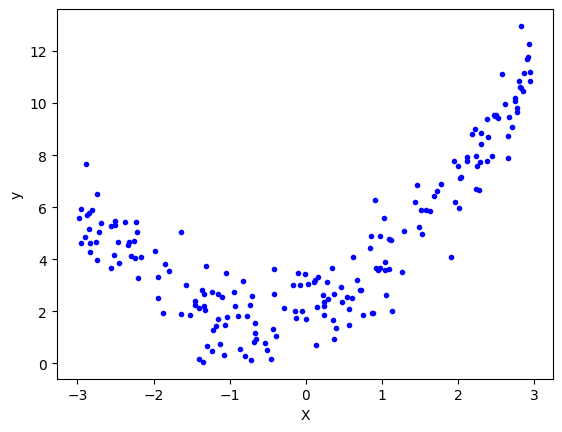

In [5]:
plt.plot(X,y,'b.')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

In [6]:
# Train test split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [7]:
#Applying LinearRegression
lr = LinearRegression()

In [8]:
lr.fit(X_train,y_train)

LinearRegression()

In [9]:
y_pred =lr.predict(X_test)
r2_score(y_test,y_pred)

0.38839568684771864

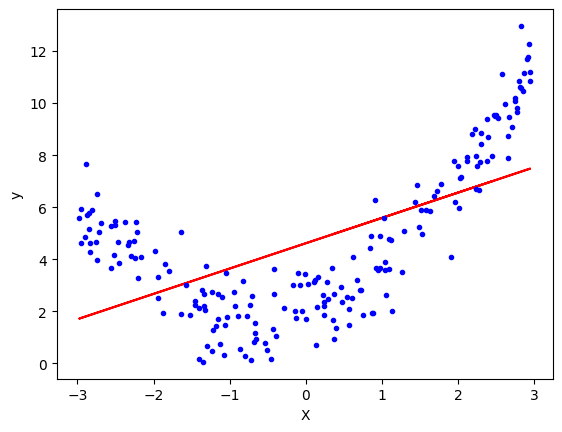

In [10]:
plt.plot(X_train,lr.predict(X_train),color='red')
plt.plot(X,y,"b.")
plt.xlabel("X")
plt.ylabel("y")
plt.show()

In [11]:
#Applying Polynomial Linear Regression
# Degree 2
poly = PolynomialFeatures(degree=2)

X_train_trans = poly.fit_transform(X_train)
X_test_trans = poly.transform(X_test)

In [12]:
print(X_train[0])
print(X_train_trans[0])

[2.44044828]
[1.         2.44044828 5.95578782]


In [13]:
lr=LinearRegression()
lr.fit(X_train_trans,y_train)

LinearRegression()

In [14]:
y_pred = lr.predict(X_test_trans)

In [29]:
poly.powers_

array([[0],
       [1],
       [2]])

In [15]:
r2_score(y_test,y_pred)

0.910093066921378

In [16]:
print(lr.coef_)
print(lr.intercept_)

[[0.         0.91965874 0.76895154]]
[2.05873011]


In [17]:
X_new = np.linspace(-3,3,200).reshape(200,1)
x_new_poly = poly.transform(X_new)
y_new = lr.predict(x_new_poly)

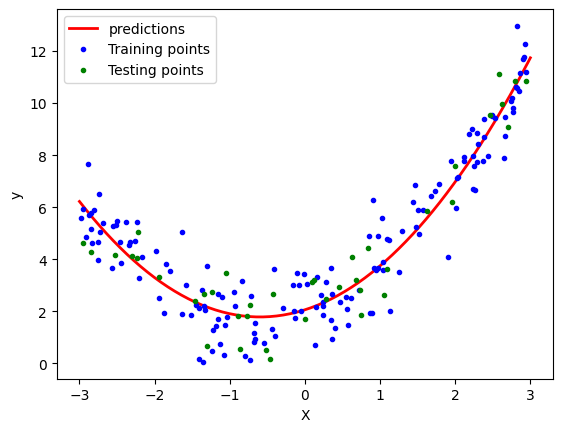

In [18]:
plt.plot(X_new,y_new,"-r",linewidth=2,label="predictions")
plt.plot(X_train,y_train,"b.",label="Training points")
plt.plot(X_test,y_test,"g.",label="Testing points")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


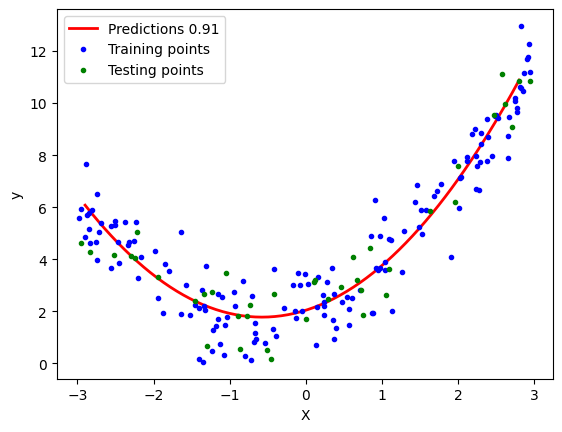

In [30]:
# Applying Gradient Descent

poly = PolynomialFeatures(degree=2)

X_train_trans = poly.fit_transform(X_train)
X_test_trans = poly.transform(X_test)

sgd = SGDRegressor(max_iter=100)
sgd.fit(X_train_trans,y_train)

X_new=np.linspace(-2.9, 2.8, 200).reshape(200, 1)
X_new_poly = poly.transform(X_new)
y_new = sgd.predict(X_new_poly)

y_pred = sgd.predict(X_test_trans)

plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions " + str(round(r2_score(y_test,y_pred),2)))
plt.plot(X_train, y_train, "b.",label='Training points')
plt.plot(X_test, y_test, "g.",label='Testing points')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

# Creating my own polynomial_regression class

In [19]:
def polynomial_regression(degree):
    X_new=np.linspace(-3, 3, 100).reshape(100, 1)
    X_new_poly = poly.transform(X_new)

    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ])
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    plt.plot(X_new, y_newbig,'r', label="Degree " + str(degree), linewidth=2)

    plt.plot(X_train, y_train, "b.", linewidth=3)
    plt.plot(X_test, y_test, "g.", linewidth=3)
    plt.legend(loc="upper left")
    plt.xlabel("X")
    plt.ylabel("y")
    plt.axis([-3, 3, 0, 10])
    plt.show()

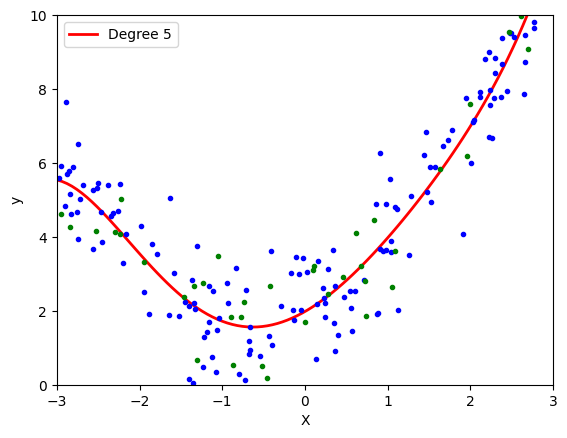

In [20]:
polynomial_regression(5)
